# 1. Load the data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp

# from scipy.special import erfinv
from scipy.stats import norm

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
data_train_raw = pd.read_csv('../input/clean-new-ft-train.csv')
# data_train_raw = data_train_raw.sample(frac=0.01, random_state=0)
data_test_raw = pd.read_csv('../input/clean-new-ft-test.csv')

In [3]:
print(data_train_raw.shape)
print(data_test_raw.shape)

(187954, 61)
(125546, 60)


In [4]:
data_train_raw.head()

,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,cat1cat72_freq,loss_g
0,A,A,A,B,A,D,B,B,D,D,...,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,0.105084,7.702637
1,A,A,A,A,A,D,B,B,D,D,...,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,0.063871,7.158203
2,A,A,A,A,A,D,B,B,B,D,...,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,0.164987,8.008396
3,A,B,A,A,A,D,B,B,D,D,...,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,0.105084,6.846784
4,B,A,A,A,A,D,B,D,B,D,...,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,0.145266,7.924742


In [5]:
data_test_raw.head()

,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,cat1cat72_freq
0,A,A,A,A,A,D,B,B,D,D,...,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562,0.114231
1,B,A,A,B,A,D,B,B,D,D,...,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045,0.187841
2,A,A,A,A,B,D,B,B,B,B,...,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232,0.496757
3,B,A,A,A,A,D,B,D,B,D,...,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955,0.151282
4,A,A,A,A,A,D,B,B,D,D,...,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823,0.114231


# 2. Check data transformation

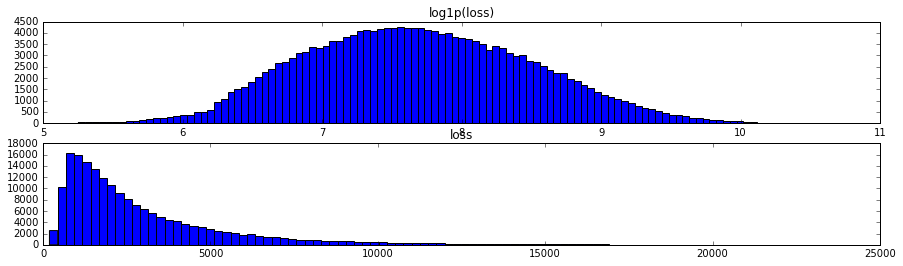

In [6]:
def lossRestore(val_g):
    return np.expm1(val_g)

plt.figure(figsize=(15,4))

plt.subplot(2,1,1)
plt.hist(data_train_raw['loss_g'],100)
plt.title('log1p(loss)');

plt.subplot(2,1,2)
plt.hist(lossRestore(data_train_raw['loss_g']),100)
plt.title('loss');

# 3. Data preparation

### labeling encoder

In [7]:
# save label in a seperate serie
labelSs = data_train_raw['loss_g'] 
trainDf = data_train_raw.drop(['loss_g'],axis=1)
# subId = data_test_raw['id']
testDf = data_test_raw

print('trainDf has features from the raw data:\n{}'.format(trainDf.columns))
print('testDf has features from the raw data:\n{}'.format(testDf.columns))

trainDf has features from the raw data:
Index([u'cat72', u'cat73', u'cat74', u'cat75', u'cat76', u'cat77', u'cat78',
       u'cat79', u'cat80', u'cat81', u'cat82', u'cat83', u'cat84', u'cat85',
       u'cat86', u'cat87', u'cat88', u'cat89', u'cat90', u'cat91', u'cat92',
       u'cat93', u'cat94', u'cat95', u'cat96', u'cat97', u'cat98', u'cat99',
       u'cat100', u'cat101', u'cat102', u'cat103', u'cat104', u'cat105',
       u'cat106', u'cat107', u'cat108', u'cat109', u'cat110', u'cat111',
       u'cat112', u'cat113', u'cat114', u'cat115', u'cat116', u'cont1',
       u'cont2', u'cont3', u'cont4', u'cont5', u'cont6', u'cont7', u'cont8',
       u'cont9', u'cont10', u'cont11', u'cont12', u'cont13', u'cont14',
       u'cat1cat72_freq'],
      dtype='object')
testDf has features from the raw data:
Index([u'cat72', u'cat73', u'cat74', u'cat75', u'cat76', u'cat77', u'cat78',
       u'cat79', u'cat80', u'cat81', u'cat82', u'cat83', u'cat84', u'cat85',
       u'cat86', u'cat87', u'cat88', u'cat8

In [8]:
dataAll = pd.concat([trainDf,testDf])
dataCatAll = dataAll.select_dtypes(include=['object'])
dataFltAll = dataAll.select_dtypes(include=['float64'])
print('the stacked data\'s dimension are:\n{}'.format(dataAll.shape))
print('{} of which are categorical'.format(dataCatAll.shape))
print('{} of which are continuous'.format(dataFltAll.shape))

the stacked data's dimension are:
(313500, 60)
(313500, 45) of which are categorical
(313500, 15) of which are continuous


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in dataCatAll.columns:
    if (col.find('cat') !=-1):
#        print(col)
        dataCatAll[col]=le.fit_transform(dataCatAll[col])
#         dataAll[col] = dataAll[col].map(lambda s: '<unknown>' if s not in le.classes_ else s)
#         le.classes_ = np.append(le.classes_, '<unknown>')
#         data_test_raw[str(col+'_numerical')]=le.transform(data_test_raw[col])
print(dataCatAll.columns)


/home/ec2-user/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index([u'cat72', u'cat73', u'cat74', u'cat75', u'cat76', u'cat77', u'cat78',
       u'cat79', u'cat80', u'cat81', u'cat82', u'cat83', u'cat84', u'cat85',
       u'cat86', u'cat87', u'cat88', u'cat89', u'cat90', u'cat91', u'cat92',
       u'cat93', u'cat94', u'cat95', u'cat96', u'cat97', u'cat98', u'cat99',
       u'cat100', u'cat101', u'cat102', u'cat103', u'cat104', u'cat105',
       u'cat106', u'cat107', u'cat108', u'cat109', u'cat110', u'cat111',
       u'cat112', u'cat113', u'cat114', u'cat115', u'cat116'],
      dtype='object')


### skipped - restore to x_trainDf and x_testDf

In [10]:
# # hstack all the features and .
# x_allDf = pd.concat([dataCatAll,dataFltAll],axis=1)
# x_means = x_allDf.mean()
# x_stds = x_allDf.std()
# x_allDf = (x_allDf-x_means)/x_stds
# x_allDf.head()

In [11]:
# x_Train = x_allDf.iloc[0:len(labelSs),:]
# x_Test = x_allDf.iloc[len(labelSs):,:]
# y_Train = labelSs

### one-hot-encoding

In [12]:
# one-hot-encoding the categorical features
enc = preprocessing.OneHotEncoder()
x_catAll = enc.fit_transform(dataCatAll)
print(x_catAll.shape)

(313500, 1033)


In [13]:
# split x_train and x_test
x_Train = sp.sparse.hstack((x_catAll[0:len(labelSs),:], sp.sparse.csr_matrix(dataFltAll.as_matrix())[0:len(labelSs),:]))
x_Test = sp.sparse.hstack((x_catAll[len(labelSs):,:], sp.sparse.csr_matrix(dataFltAll.as_matrix())[len(labelSs):,:]))
y_Train = labelSs.values

### check the dimension of prepared data

In [14]:
print(x_Test.shape)
print(x_Train.shape)
print(y_Train.shape)

(125546, 1048)
(187954, 1048)
(187954,)


### split the training data for valiation

In [15]:
from sklearn import cross_validation
val_size = 0.2
seed = 0
x_train, x_val, y_train, y_val = cross_validation.train_test_split(x_Train, y_Train, test_size=val_size, random_state=seed)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

/home/ec2-user/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(150363, 1048)
(150363,)
(37591, 1048)
(37591,)


In [16]:
del x_Train
del y_Train
# del x_catAll
# del dataCatAll
del trainDf
del testDf

# 4. 1st Level Model Fitting

In [17]:
from sklearn.metrics import mean_absolute_error
y_pred = []
y_pred_val = []
submission = pd.read_csv('../input/sample_submission.csv')
testList = ['Ridge', 'XGBoostTrees', 'AdaBoosting', 'MLPRegressor','Ensemble']

### Ridge Regression

In [18]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [19]:
cv = 3
alphas = (1e-2,1e-1,1,1e1,1e2)
# alphas = (90, 100, 120, 130,150)
# alphas = [40]
regCV = RidgeCV(cv=cv,alphas = alphas)
regCV.fit(x_train,y_train)
print('alpha: {}\n'.format(regCV.alpha_))
# print('cv_values_: {}\n'.format(regCV.cv_values_))

alpha: 10.0



In [20]:
print(mean_absolute_error(lossRestore(y_val),lossRestore(regCV.predict(x_val))))

1260.93406804


In [21]:
y_pred_i = lossRestore(regCV.predict(x_Test))
y_pred.append(y_pred_i)
y_pred_val.append(lossRestore(regCV.predict(x_val)))

### skipped - Lasso Regression - almost the same as Ridge

In [22]:
# from sklearn.linear_model import LassoCV

In [23]:
# cv = 3
# # alphas = (1e-3,1e-2,1e-1,1,1e1,1e2,1e3)
# # alphas = (0.0005,0.0007,0.001,0.003,0.005)
# # alphas = [0.00005,0.0001,0.0003,0.0005]
# alphas = [0.00005]
# LassoCV = LassoCV(cv=cv,alphas = alphas)
# LassoCV.fit(x_train,y_train)
# print('alpha: {}\n'.format(LassoCV.alpha_))

In [24]:
# print(mean_absolute_error(lossRestore(y_val,ymean,ystd),lossRestore(LassoCV.predict(x_val),ymean,ystd)))

In [25]:
# y_pred_i = lossRestore(LassoCV.predict(x_Test),ymean,ystd)
# y_pred.append(y_pred_i)
# y_pred_val.append(lossRestore(LassoCV.predict(x_val),ymean,ystd))

### Skipped - Random Forest - using mse rather than mae, because the mae implementation is much slower.

In [26]:
# from sklearn.ensemble import RandomForestRegressor

In [27]:
# criterion = 'mse'
# n_estimators = [30]
# err = 999999999
# n_estimator = 0
# random_state = 0
# for n_est in n_estimators:
#     tmpRFReg = RandomForestRegressor(n_estimators = n_est,criterion = criterion, random_state = random_state)
#     tmpRFReg.fit(x_train,y_train)
#     err_i = mean_absolute_error(lossRestore(y_val,ymean,ystd),lossRestore(tmpRFReg.predict(x_val),ymean,ystd))
#     print(err_i)
#     if err_i < err:
#         RFReg = tmpRFReg
#         n_estimator = n_est
#         err = err_i

In [28]:
# print('n_estimator = {}'.format(n_estimator))
# print(mean_absolute_error(lossRestore(y_val,ymean,ystd),lossRestore(RFReg.predict(x_val),ymean,ystd)))

In [29]:
# y_pred_i = lossRestore(RFReg.predict(x_Test),ymean,ystd)
# y_pred.append(y_pred_i)
# y_pred_val.append(lossRestore(RFReg.predict(x_val),ymean,ystd))

### XGBoost Trees

In [30]:
import xgboost as xgb

In [31]:
# x_train, x_val, y_train, y_val
# d_train_xgb = xgb.DMatrix(x_train.tocsc(),label=y_train)
# d_val_xgb = xgb.DMatrix(x_val.tocsc(),label = y_val)
# x_val_xgb = xgb.DMatrix(x_val.tocsc())
# d_test_xgb = xgb.DMatrix(x_Test.tocsc())
d_train_xgb = xgb.DMatrix(x_train,label=y_train)
d_val_xgb = xgb.DMatrix(x_val,label = y_val)
x_val_xgb = xgb.DMatrix(x_val)
d_test_xgb = xgb.DMatrix(x_Test)

In [58]:
num_round = 33
params = {'eval_metric':'rmse','max_depth':9,'colsample_bytree':0.5}
watchlist  = [(d_val_xgb,'eval'), (d_train_xgb,'train')]
gbt = xgb.train(params, d_train_xgb,num_round,watchlist)

[0]	eval-rmse:5.08482	train-rmse:5.08072
[1]	eval-rmse:3.58729	train-rmse:3.58393
[2]	eval-rmse:2.54779	train-rmse:2.54451
[3]	eval-rmse:1.83232	train-rmse:1.82867
[4]	eval-rmse:1.34891	train-rmse:1.3435
[5]	eval-rmse:1.03086	train-rmse:1.02348
[6]	eval-rmse:0.829256	train-rmse:0.819913
[7]	eval-rmse:0.70842	train-rmse:0.696179
[8]	eval-rmse:0.639588	train-rmse:0.624808
[9]	eval-rmse:0.602091	train-rmse:0.585585
[10]	eval-rmse:0.582038	train-rmse:0.563696
[11]	eval-rmse:0.570747	train-rmse:0.550582
[12]	eval-rmse:0.564969	train-rmse:0.543211
[13]	eval-rmse:0.561273	train-rmse:0.537767
[14]	eval-rmse:0.5593	train-rmse:0.534344
[15]	eval-rmse:0.558161	train-rmse:0.531322
[16]	eval-rmse:0.557192	train-rmse:0.52894
[17]	eval-rmse:0.556516	train-rmse:0.52714
[18]	eval-rmse:0.556004	train-rmse:0.525659
[19]	eval-rmse:0.555641	train-rmse:0.524392
[20]	eval-rmse:0.555262	train-rmse:0.523148
[21]	eval-rmse:0.555012	train-rmse:0.521943
[22]	eval-rmse:0.554766	train-rmse:0.521014
[23]	eval-rmse:0

In [59]:
print(mean_absolute_error(lossRestore(y_val),lossRestore(gbt.predict(x_val_xgb))))

1191.30375242


In [34]:
y_pred_i = lossRestore(gbt.predict(d_test_xgb))
y_pred.append(y_pred_i)
y_pred_val.append(lossRestore(gbt.predict(x_val_xgb)))

### AdaBoost Regression

In [35]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge

In [36]:
# n_estimators = [4,6,8,10,20,30,40,50,60,70,80,90,100,110,120]
n_estimators = [6,10,40,70,100,120]
# n_estimators = [6]
base_estimator = Ridge(alpha = 40)
err = 999999999
n_estimator = 0
random_state = 0
for n_est in n_estimators:
#     tmpAdReg = AdaBoostRegressor(n_estimators = n_est, random_state = random_state,base_estimator = base_estimator)
    tmpAdReg = AdaBoostRegressor(n_estimators = n_est, random_state = random_state)
    tmpAdReg.fit(x_train,y_train)
    err_i = mean_absolute_error(lossRestore(y_val),lossRestore(tmpAdReg.predict(x_val)))
    print(err_i)
    if err_i < err:
        AdReg = tmpAdReg
        n_estimator = n_est
        err = err_i

1408.78858092
1428.47401025
1511.16292214
1520.16483783
1520.16483783
1520.16483783


In [37]:
print('n_estimator = {}'.format(n_estimator))
print(mean_absolute_error(lossRestore(y_val),lossRestore(AdReg.predict(x_val))))

n_estimator = 6
1408.78858092


In [38]:
y_pred_i = lossRestore(AdReg.predict(x_Test))
y_pred.append(y_pred_i)
y_pred_val.append(lossRestore(AdReg.predict(x_val)))

### Skipped - K Nearest Neighbors

In [39]:
# from sklearn.neighbors import KNeighborsRegressor

In [40]:
# n_neighbors = [5, 10, 15]
# weights = 'distance'
# err = 999999999
# n_nns = 0
# # random_state = 0
# for n_nn in n_neighbors:
#     tmpKNReg = KNeighborsRegressor(n_neighbors = n_nn,weights = weights)
#     tmpKNReg.fit(x_train,y_train)
#     err_i = mean_absolute_error(lossRestore(y_val,ymean,ystd),lossRestore(tmpKNReg.predict(x_val),ymean,ystd))
#     print(err_i)
#     if err_i < err:
#         KNReg = tmpKNReg
#         n_nns = n_nn
#         err = err_i

In [41]:
# print('n_neighbors = {}'.format(n_nns))
# print(mean_absolute_error(lossRestore(y_val,ymean,ystd),lossRestore(KNReg.predict(x_val),ymean,ystd)))

In [42]:
# y_pred_i = lossRestore(KNReg.predict(x_Test),ymean,ystd)
# y_pred.append(y_pred_i)
# y_pred_val.append(lossRestore(KNReg.predict(x_val),ymean,ystd))

### skipped - Linear SVR - similar to the Ridge results

In [43]:
# from sklearn.svm import LinearSVR,SVR

In [44]:
## SVReg = SVR(kernel = 'rbf')
## SVReg.fit(x_train,y_train)
#SVReg = LinearSVR(C=0.5)
#SVReg.fit(x_train,y_train)

In [45]:
# print(mean_absolute_error(lossRestore(y_val,ymean,ystd),lossRestore(SVReg.predict(x_val),ymean,ystd)))

In [46]:
# y_pred_i = lossRestore(SVReg.predict(x_Test),ymean,ystd)
# y_pred.append(y_pred_i)
# y_pred_val.append(lossRestore(SVReg.predict(x_val),ymean,ystd))

### MLP Regressor

In [47]:
from sklearn.neural_network import MLPRegressor

In [48]:
MLPReg = MLPRegressor(alpha = 1e-5, hidden_layer_sizes = (75,3),random_state=0,early_stopping=True)
MLPReg.fit(x_train,y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(75, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [49]:
print(mean_absolute_error(lossRestore(y_val),lossRestore(MLPReg.predict(x_val))))

1197.48621604


In [50]:
y_pred_i = lossRestore(MLPReg.predict(x_Test))
y_pred.append(y_pred_i)
y_pred_val.append(lossRestore(MLPReg.predict(x_val)))

### Averaging results to get the ensemble

In [51]:
# ensemble the results
y_pred.append(np.ndarray.mean(np.vstack(y_pred).T,axis=1))

# ensembled y_val
print('The loss of the ensembled result:')
y_pred_val_en = np.ndarray.mean(np.vstack(y_pred_val).T,axis=1)
mean_absolute_error(lossRestore(y_val),y_pred_val_en)

The loss of the ensembled result:


1198.3996878033417

In [52]:
y_pred_val.append(y_pred_val_en)
# testList.append('y_val')
# testList

# 5. Check the correlation among results of different models

### correlation among all the predicted resutls for the validation set

In [53]:
# testList.append('y_val')
yValPredDf = pd.DataFrame(data=np.column_stack(y_pred_val), columns = testList )

yValPredDf = yValPredDf.applymap(lambda x: (np.log1p(x)-ymean)/ystd)
yValPredDf['y_val'] = y_val
yValPredDf.head()

NameError: ("global name 'ymean' is not defined", u'occurred at index Ridge')

In [ ]:
# (np.log1p(y_pred_val[5])-ymean)/ystd

In [ ]:
import seaborn as sns
sns.pairplot(yValPredDf);

### generate new features from the intermediate results of level 1

In [ ]:
x_train_1 = np.column_stack([regCV.predict(x_train), gbt.predict(d_train_xgb), AdReg.predict(x_train), MLPReg.predict(x_train)])

x_val_1 = np.column_stack(y_pred_val[0:4])
x_val_1 = (np.log1p(x_val_1)-ymean)/ystd

x_test_1 = np.column_stack(y_pred[0:4])
x_test_1 = (np.log1p(x_test_1)-ymean)/ystd

In [ ]:
print(x_train_1.shape)
print(x_val_1.shape)
print(x_test_1.shape)

In [ ]:
# x_train_1
# x_val_1
# x_test_1

# 6. 2nd Level Model Fitting

### Ridge

In [ ]:
cv = 5
alphas = [1e-3,1e-2,1e-1,1,1e1,1e2,1e3]
# alphas = (20,30,40)
# alphas = [40]
regCV_2 = RidgeCV(cv=cv,alphas = alphas)
regCV_2.fit(x_train_1,y_train)
print('alpha: {}\n'.format(regCV_2.alpha_))
# print('cv_values_: {}\n'.format(regCV_2.cv_values_))

In [ ]:
print(mean_absolute_error(lossRestore(y_val),lossRestore(regCV_2.predict(x_val_1))))

In [ ]:
y_pred_i = lossRestore(regCV_2.predict(x_test_1))
y_pred.append(y_pred_i)
y_pred_val.append(lossRestore(regCV_2.predict(x_val_1)))

### XGBoost

In [ ]:
d_train_xgb_1 = xgb.DMatrix(x_train_1,label=y_train)
d_val_xgb_1 = xgb.DMatrix(x_val_1,label = y_val)
x_val_xgb_1 = xgb.DMatrix(x_val_1)
d_test_xgb_1 = xgb.DMatrix(x_test_1)

In [ ]:
num_round = 8
params = {'eval_metric':'rmse','max_depth':9}
watchlist  = [(d_val_xgb_1,'eval'), (d_train_xgb_1,'train')]
gbt_1 = xgb.train(params, d_train_xgb_1,num_round,watchlist)

In [ ]:
print(mean_absolute_error(lossRestore(y_val),lossRestore(gbt_1.predict(x_val_xgb_1))))

In [ ]:
y_pred_i = lossRestore(gbt_1.predict(d_test_xgb_1))
y_pred.append(y_pred_i)
y_pred_val.append(lossRestore(gbt_1.predict(x_val_xgb_1)))

# 7. Save results and the trained model

In [ ]:
# Save all the predictions for submission
for i,stri in enumerate(testList):
    submission['id'] = subId
    submission['loss']=pd.Series(data=y_pred[i])
    submission.to_csv('../output/'+stri+'.csv',index=False)

In [ ]:
from sklearn.externals import joblib
joblib.dump([regCV, gbt, AdReg, MLPReg, y_pred, y_pred_val, x_train, x_val, y_train, y_val, x_Test]
            ,'../output/models_data_on_raw_features.pkl',compress=3) 

# clf = joblib.load('filename.pkl') 